In [4]:
import sys
#change it to your path
BaseAlgPath = "/home/xuhangkun/Code/BaseAlgorithm"
sys.path.append(BaseAlgPath)

In [5]:
from BaseAlgorithm.sort import Select,Insertion,Shell,Merge,Quick
import random
#create sort class
select = Select()
insertion = Insertion()
shell = Shell()
merge = Merge()
quick = Quick()

## How to use
we will show how to use thes sort algorithm here and test their performance.

In this test, we can see that quick-sort and merge-sort are much faster than other sort algorithms here

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,timedelta
#create the run time dataFrame
algirithms = [select,insertion,shell,merge,quick]
alg_name = ["Select","Insertion","Shell","Merge","Quick"]
cmp_sort = {"Length":[],"Select":[],"Insertion":[],"Shell":[],"Merge":[],"Quick":[]}
for i in range(5,15):
    length = pow(2,i)
    cmp_sort["Length"].append(length)
    #create a random list
    rand_list = []
    for j in range(length):
        rand_list.append(random.randint(0,10*length)*0.9)
    for j in range(5):
        start_time = datetime.now()
        algirithms[j].sort(rand_list)
        endtime = datetime.now()
        if algirithms[j].isSorted(rand_list):
            seconds = (endtime-start_time).total_seconds()
            cmp_sort[alg_name[j]].append(seconds)
        else:
            cmp_sort[alg_name[j]].append(0)
        random.shuffle(rand_list)
print(cmp_sort)

{'Length': [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384], 'Select': [9.8e-05, 0.000332, 0.001374, 0.005127, 0.021895, 0.099881, 0.341581, 1.55388, 5.701868, 22.575039], 'Insertion': [0.000126, 0.000492, 0.001933, 0.007745, 0.033412, 0.134241, 0.567995, 2.702744, 8.872357, 36.778156], 'Shell': [0.000175, 0.000634, 0.00278, 0.009545, 0.037613, 0.147948, 0.59603, 2.388065, 10.383635, 39.506214], 'Merge': [7.4e-05, 0.000149, 0.000334, 0.000724, 0.001912, 0.004103, 0.008182, 0.017954, 0.060258, 0.083834], 'Quick': [6.4e-05, 0.000136, 0.000622, 0.000702, 0.00173, 0.003926, 0.00877, 0.018777, 0.065498, 0.085835]}


           Select  Insertion      Shell     Merge     Quick
Length                                                     
32       0.000098   0.000126   0.000175  0.000074  0.000064
64       0.000332   0.000492   0.000634  0.000149  0.000136
128      0.001374   0.001933   0.002780  0.000334  0.000622
256      0.005127   0.007745   0.009545  0.000724  0.000702
512      0.021895   0.033412   0.037613  0.001912  0.001730
1024     0.099881   0.134241   0.147948  0.004103  0.003926
2048     0.341581   0.567995   0.596030  0.008182  0.008770
4096     1.553880   2.702744   2.388065  0.017954  0.018777
8192     5.701868   8.872357  10.383635  0.060258  0.065498
16384   22.575039  36.778156  39.506214  0.083834  0.085835


<Figure size 648x504 with 0 Axes>

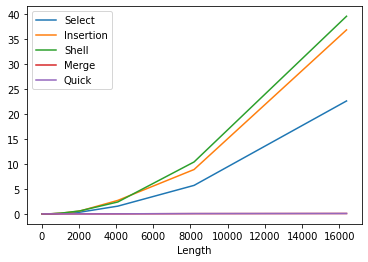

In [12]:
cmp_df = pd.DataFrame(cmp_sort)
cmp_df.index = cmp_df["Length"]
del cmp_df["Length"]
print(cmp_df)
figure = plt.figure(figsize=(9,7))
cmp_df.plot()
plt.legend(loc="best")

## Expansion
If you need to sort special data structure, you can create a special sort which inherit from certain sort class. When you
do that, you need to rewrite the smaller and bigger function.

In [14]:
class MySort(Quick):
    """my sort
    """

    def smaller(self,cmp_i,cmp_j):
        """rewrite this fucntion
           write the rule you want
        """
        return cmp_i.id <= cmp_j.id

    def bigger(self,cmp_i,cmp_j):
        """rewrite this fucntion
            write the rule you want
        """
        return cmp_i.id >= cmp_j.id
class MyClass:
    """my class
    """
    def __init__(self):
        self.id = 0

    def SetId(self,id):
        self.id = id

my_list = []
mysort = MySort()
for i in range(15):
    my_class = MyClass()
    my_class.SetId(random.randint(0,20))
    my_list.append(my_class)
mysort.sort(my_list)
for i in range(15):
    print(my_list[i].id)
#you can see that we do sort my_list

1
2
4
4
5
6
7
7
7
7
8
12
14
16
17
